<font size ="4">**Importing all the libraries**</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import re
import nltk
import os
import pickle
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, mean_absolute_error, roc_auc_score, log_loss
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from timeit import default_timer as timer
from sklearnex import patch_sklearn, unpatch_sklearn
from IPython.display import HTML

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/u185882/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/u185882/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/u185882/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

The above code snippet imports several libraries and modules necessary for data manipulation, visualization, text processing, and operating system interactions. The NLTK downloads ensure that the required NLTK resources (tokenizer, stopwords, and WordNet) are available for subsequent text processing operations.

1. Install Dependencies:
The code includes a set of dependencies that need to be installed before they can be imported.
   - `pip install transformers matplotlib ipykernel`: Installs the transformers, matplotlib, and ipykernel packages.
   - `pip install pandas`: Installs the pandas package.
   - `pip install nltk`: Installs the nltk package.
   - `pip install seaborn tqdm`: Installs the seaborn and tqdm packages.
   - `pip install scikit-learn`: Installs the scikit-learn package.
   - `pip install xgboost`: Installs the xgboost package.
   - The last command registers the environment as a kernel for Jupyter Notebook.

2. Import Statements:
   - `import pandas as pd`: Imports the pandas library, which is a powerful data manipulation and analysis tool. The `pd` alias is used for convenience.
   - `import numpy as np`: Imports the NumPy library, which provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions.
   - `import seaborn as sns`: Imports the seaborn library, which is a data visualization library based on matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics.
   - `import matplotlib.pyplot as plt`: Imports the pyplot module from the matplotlib library, which is a plotting library for creating static, animated, and interactive visualizations in Python.
   - `from tqdm import tqdm`: Imports the tqdm library, which provides a fast, extensible progress bar for loops and other iterable objects.
   - `import re`: Imports the re module, which provides support for regular expressions in Python. Regular expressions are used for pattern matching and text manipulation.
   - `import nltk`: Imports the Natural Language Toolkit (NLTK), which is a library for working with human language data. It provides a wide range of functionalities for text processing and analysis.
   - `import os`: Imports the os module, which provides a way to use operating system dependent functionality, such as reading or writing to the file system.
   -`import pickle`: Imports the `pickle` module in Python, which provides functionality for serializing and deserializing Python objects. It is commonly used for saving and loading objects, such as machine learning models, caching computations, sharing data between programs, and storing configuration settings.
   - `from nltk.tokenize import word_tokenize`: Imports the `word_tokenize` function from NLTK's `tokenize` module. This function is used to split text into individual words or tokens.
   - `from nltk.corpus import stopwords`: Imports the `stopwords` module from NLTK's `corpus` package. This module provides a list of common stopwords that can be used for text preprocessing.
   - `from nltk.stem import WordNetLemmatizer`: Imports the `WordNetLemmatizer` class from NLTK's `stem` module. The lemmatizer is used to reduce words to their base or root form, which can be helpful for text normalization.
   - `from sklearn.model_selection import train_test_split`: Imports the `train_test_split` function from scikit-learn's `model_selection` module. This function is used to split data into training and testing sets for machine learning.
   - `from sklearn.feature_extraction.text import TfidfVectorizer`: Imports the `TfidfVectorizer` class from scikit-learn's `feature_extraction.text` module. This class is used to convert a collection of raw documents to a matrix of TF-IDF features.
   - `from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, mean_absolute_error, roc_auc_score, log_loss`: Imports various evaluation metrics from scikit-learn's `metrics` module. These metrics are commonly used to evaluate the performance of machine learning models.
   - `from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier`: Imports the `LogisticRegression` and `PassiveAggressiveClassifier` classes from scikit-learn's `linear_model` module. These classes are used for logistic regression and passive aggressive classification, respectively.
   - `from sklearn.tree import DecisionTreeClassifier`: Imports the `DecisionTreeClassifier` class from scikit-learn's `tree` module. This class is used for decision tree classification.
   - `from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier`: Imports the `RandomForestClassifier` and `GradientBoostingClassifier` classes from scikit-learn's `ensemble` module. These classes are used for random forest and gradient boosting classification, respectively.
   - `import xgboost as xgb`: Imports the xgboost library, which is an optimized implementation of the gradient boosting machine learning algorithm.
   - `from timeit import default_timer as timer`: Imports the `default_timer` function from the `timeit` module. This function is used to measure the execution time of code.
   - `from sklearnex import patch_sklearn, unpatch_sklearn`: Imports functions from the `sklearnex` module. These functions are used to patch scikit-learn's classes with enhanced versions that provide additional functionality.
   - `from IPython.display import HTML`: Imports the `HTML` class from IPython's `display` module. This class is used to display HTML content in Jupyter notebooks.

3. NLTK Downloads:
   - `nltk.download('punkt')`: Downloads the Punkt tokenizer from NLTK. The Punkt tokenizer is used for tokenizing sentences into individual words.
   - `nltk.download('stopwords')`: Downloads a collection of stopwords from NLTK. Stopwords are commonly used words (e.g., "the", "is", "and") that are often removed from text data during preprocessing.
   - `nltk.download('wordnet')`: Downloads the WordNet lexical database from NLTK. WordNet is a large English lexical database that provides a semantic network of words and their meanings.

<font size ="4">**Downloading the dataset and extracting it to the appropriate data directory.**</font>

In [2]:
data_directory = 'data/'
if not os.path.exists(data_directory):
    !mkdir data/
    !wget https://onlineacademiccommunity.uvic.ca/isot/wp-content/uploads/sites/7295/2023/03/News-_dataset.zip --directory-prefix=data/
    !unzip data/News-_dataset.zip -d data/

The code checks if the `data_directory` exists. If it does not exist, it creates the directory, downloads a zip file from the specified URL, and extracts the contents of the zip file into the "data/" directory. The code uses the `os` module to check for the existence of the directory and utilizes shell commands (`mkdir`, `wget`, and `unzip`) to create the directory, download the file, and extract its contents.

1. Variables:
   - `data_directory = 'data/'`: This variable stores the path to the directory where the data will be stored.

2. `os.path.exists()`:
   - `os.path.exists(data_directory)`: This function from the `os` module checks if the specified path exists in the file system. In this case, it checks if the `data_directory` exists.

3. Conditional Statement:
   - `if not os.path.exists(data_directory):`: This conditional statement checks if the `data_directory` does not exist. If the condition is `True`, the code block following the conditional statement will be executed.

4. Shell Commands:
   - `!mkdir data/`: This shell command, executed using the `!` prefix, creates a new directory named "data/".
   - `!wget https://onlineacademiccommunity.uvic.ca/isot/wp-content/uploads/sites/7295/2023/03/News-_dataset.zip --directory-prefix=data/`: This shell command uses `wget` to download a file from the specified URL. The `--directory-prefix=data/` flag indicates that the downloaded file should be saved in the "data/" directory.
   - `!unzip data/News-_dataset.zip -d data/`: This shell command uses `unzip` to extract the contents of the "News-_dataset.zip" file into the "data/" directory.

<font size="4">**Read the data csv files**</font>

In [3]:
fake_data = pd.read_csv('data/Fake.csv')
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true_data = pd.read_csv('data/True.csv')
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


The above code snippets use the `pd.read_csv()` function from the pandas library to read data from the "Fake.csv" and "True.csv" files located in the "data/" directory. The resulting DataFrames are stored in the `fake_data` and `true_data` variables, respectively. The `.head()` method is then used on each DataFrame to display the first few rows of the data.

1. Dependencies:
   - `import pandas as pd`

2. Functions and Classes:
   - `pd.read_csv()`: This function is provided by the pandas library and is used to read data from a CSV (Comma-Separated Values) file and create a DataFrame, which is a tabular data structure. In this code, it reads the data from the "Fake.csv" file and "True.csv" file located in the "data/" directory and returns a DataFrame.

3. Variables:
   - `fake_data`: This variable is assigned the result of calling `pd.read_csv('data/Fake.csv')`, which is a DataFrame containing the data read from the "Fake.csv" file.
   - `true_data`: This variable is assigned the result of calling `pd.read_csv('data/True.csv')`, which is a DataFrame containing the data read from the "True.csv" file.

4. DataFrame Methods: Display the first few rows of the DataFrame. By default, it shows the first five rows. It is a convenient way to quickly inspect the structure and content of the DataFrame.
   - `fake_data.head()`: This method is called on the DataFrame `fake_data`. 
   - `true_data.head()`: This method is called on the DataFrame `true_data`.

Assigning Classes to the Dataset

In [5]:
true_data["label"] = 1
fake_data["label"] = 0

The code modifies the existing DataFrames `true_data` and `fake_data` by adding a new column named "label" to each DataFrame. The "label" column is assigned a value of 1 for all rows in the `true_data` DataFrame, indicating that the news articles in that DataFrame are considered true. Similarly, the "label" column is assigned a value of 0 for all rows in the `fake_data` DataFrame, indicating that the news articles in that DataFrame are considered fake. This modification allows the data to have a common column for indicating the label or category of each news article.

1. Dependencies:
   - The code snippet assumes that the pandas library has already been imported.

2. DataFrame Manipulation:
   - `true_data["label"] = 1`: This line of code adds a new column named "label" to the DataFrame `true_data` and assigns the value 1 to all rows in that column. The syntax `true_data["label"]` selects the "label" column, and `= 1` assigns the value 1 to all rows in that column.
   - `fake_data["label"] = 0`: Similarly, this line of code adds a new column named "label" to the DataFrame `fake_data` and assigns the value 0 to all rows in that column. It follows the same syntax as the previous line, but assigns the value 0 instead of 1.

Merging Both the Dataset

In [6]:
data = pd.concat([true_data, fake_data], axis=0)

The code snippet uses the `pd.concat()` function from the pandas library to vertically concatenate the `true_data` and `fake_data` DataFrames. The resulting concatenated DataFrame is stored in the `data` variable. This operation allows combining the two separate DataFrames into a single DataFrame, which contains both the true and fake news articles.

1. Dependencies:
   - the pandas library

2. Functions and Classes:
   - `pd.concat()`: This function is provided by the pandas library and is used to concatenate or combine DataFrames vertically or horizontally. In this code, it is used to concatenate the `true_data` and `fake_data` DataFrames vertically, meaning they will be stacked on top of each other.

3. Variables:
   - `data`: This variable is assigned the result of calling `pd.concat([true_data, fake_data], axis=0)`. The `pd.concat()` function is called with two arguments: `[true_data, fake_data]`, which is a list of DataFrames to be concatenated, and `axis=0`, which specifies that the concatenation should be done along the vertical axis (rows). The resulting concatenated DataFrame is assigned to the `data` variable.

Visualization of the text data based on subject column

[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'worldnews'),
 Text(2, 0, 'News'),
 Text(3, 0, 'politics'),
 Text(4, 0, 'Government News'),
 Text(5, 0, 'left-news'),
 Text(6, 0, 'US_News'),
 Text(7, 0, 'Middle-east')]

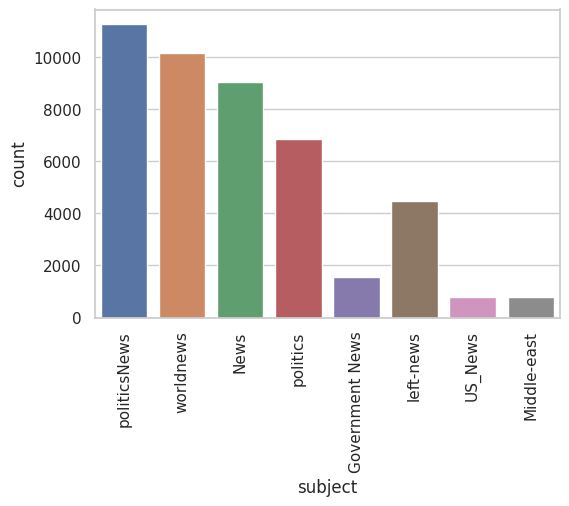

In [7]:
plt.figure(figsize = (6,4))
sns.set(style = "whitegrid",font_scale = 1.0)
chart = sns.countplot(x = "subject", data = data)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

The code snippet utilizes the `plt.figure()`, `sns.set()`, `sns.countplot()`, and `set_xticklabels()` functions to create a bar plot using seaborn. The `plt.figure()` sets the figure size, `sns.set()` sets the style and font scale, `sns.countplot()` creates the count plot, and `set_xticklabels()` rotates the x-axis tick labels. Together, these functions and settings enable the creation of a visually appealing count plot to visualize the distribution of subjects in the `data` DataFrame.

1. Dependencies:
   - `import matplotlib.pyplot as plt`
   - `import seaborn as sns`

2. Functions and Classes:
   - `plt.figure(figsize=(6,4))`: This function call sets the figure size of the plot to be created. The `figsize` argument specifies the width and height of the figure in inches.
   - `sns.set(style="whitegrid", font_scale=1.0)`: This function call is used to set the style and font scale of the seaborn plots. The `style="whitegrid"` sets the background style to white with gridlines, and `font_scale=1.0` sets the font scale to 1.0, which is the default font size.
   - `sns.countplot()`: This function is provided by the seaborn library and is used to create a bar plot showing the count of observations in each category of a categorical variable. In this code, it creates a count plot using the `x="subject"` argument to specify the variable to be plotted on the x-axis, and `data=data` to specify the DataFrame containing the data.
   - `chart.set_xticklabels(chart.get_xticklabels(), rotation=90)`: This line of code is used to rotate the x-axis tick labels by 90 degrees. The `chart.get_xticklabels()` retrieves the x-axis tick labels from the count plot, and `set_xticklabels()` sets the x-axis tick labels with the specified rotation.

<font size="4">**Data preprocessing**</font>

In [8]:
data['text'] = data['title'] +' '+data['text']
# Either you could data.drop["column names"] or del data["column names"]
del data['title']
del data['subject']
del data['date']

The title, date columns are not going to be helpful in identification of the news. So, we can drop these columns.

The code snippet manipulates the DataFrame `data` by concatenating the "title" and "text" columns into a new "text" column using string concatenation. It then deletes the "title", "subject", and "date" columns from the DataFrame, effectively removing those columns from the data. The code uses DataFrame operations such as column assignment (`data['text'] = ...`) and column deletion (`del data['column_name']`)..
   - `data['text'] = data['title'] + ' ' + data['text']`: This line of code creates a new column named "text" in the DataFrame `data`. The values in this new column are obtained by concatenating the values from the existing "title" column and "text" column with a space in between. The resulting concatenated text is assigned to the "text" column.
   - `del data['title']`: This line of code deletes the "title" column from the DataFrame `data`. The `del` keyword is used to remove a column from a DataFrame.
   - `del data['subject']`: Similarly, this line of code deletes the "subject" column from the DataFrame `data`.
   - `del data['date']`: This line of code deletes the "date" column from the DataFrame `data`.

In [9]:
data.head()

,text,label
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


The `data.head()` function is called on the `data` DataFrame to display the first few rows of the modified DataFrame. This allows us to examine the updated structure and content of the DataFrame after performing the concatenation and column deletion operations. The output of `data.head()` will show the first few rows of the DataFrame, giving you a preview of the data in its current state.

1. DataFrame Method:
   - `data.head()`: This method is called on the DataFrame `data` and is used to display the first few rows of the DataFrame. By default, it shows the first five rows. It is a convenient way to quickly inspect the structure and content of the DataFrame.

2. Variables:
   - `data`: This variable refers to the DataFrame that has been modified in the previous code snippets. It represents the combined dataset containing both true and fake news articles, with the "title" and "subject" columns removed and the text of each article concatenated into the "text" column.

In [10]:
data.shape

(44898, 2)

The code snippet accesses the `shape` attribute of the `data` DataFrame to retrieve the dimensions of the DataFrame. The `shape` attribute returns a tuple containing two elements: the number of rows and the number of columns in the DataFrame, respectively. By calling `data.shape`, you can obtain this information and understand the size and structure of the DataFrame.

1. DataFrame Attribute:
   - `data.shape`: This attribute is used to determine the shape of the DataFrame `data`, which represents the dimensions (number of rows and columns) of the DataFrame.
   
2. Variables:
   - `data`: This variable refers to the DataFrame that has been modified in the previous code snippets. It represents the combined dataset containing both true and fake news articles, with the "title" and "subject" columns removed and the text of each article concatenated into the "text" column.

Check if there is any null value (If so, then we will drop those rows)

In [11]:
data.isnull().sum() # get the count of missing/NULL values for each column. if present remove missing values

text     0
label    0
dtype: int64

The code snippet utilizes the `isnull()` method and `sum()` method to determine the count of missing or null values for each column in the `data` DataFrame. The `isnull()` method checks for missing values in each element of the DataFrame, and the `sum()` method calculates the sum of missing values for each column. The resulting count of missing values is returned as a Series. This information can be helpful in identifying columns with missing data. If missing values are present, additional steps might be taken to handle or remove them from the DataFrame.

1. DataFrame Methods and Functions:
   - `data.isnull()`: This method is called on the DataFrame `data` and checks for missing or null values in each element of the DataFrame. It returns a DataFrame of the same shape as `data`, where each element is either `True` if it is null or `False` if it is not null.
   - `.sum()`: This method is called on the result of `data.isnull()` and calculates the sum of missing values for each column. By default, it sums along the vertical axis (columns), resulting in a Series that contains the count of missing values for each column.

2. Variables:
   - `data`: This variable refers to the DataFrame that has been modified in the previous code snippets. It represents the combined dataset containing both true and fake news articles, with the "title" and "subject" columns removed and the text of each article concatenated into the "text" column.

 Now, we have to shuffle the dataset to prevent the model to get bias.

In [12]:
#Shuffling the data by sampling it randomly, then resetting the index and dropping the previous index column
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,text,label
0,Gross: How GOP Candidates Are Using Military ...,0
1,TRUMP SLAMS THE GLOBALISTS: “There is no globa...,0
2,BREAKING REPORT: MITT ROMNEY To Make Huge Anno...,0
3,OBAMA SIDEKICK VALERIE JARRETT In Hot Water Ov...,0
4,TODAY: LIST OF U.S. CITIES Where “DAY OF RAGE”...,0


The code snippet shuffles the rows of the DataFrame `data` by randomly sampling the entire DataFrame using `data.sample(frac=1)`. The `.reset_index()` method is then called to reset the index of the DataFrame, creating a new index starting from 0. Finally, the `.drop()` method is used to drop the previous index column from the DataFrame. This results in a shuffled DataFrame where the rows are in a random order, and a new index column is assigned. The `data.head()` function is then called to display the first few rows of the shuffled DataFrame.
 
1. DataFrame Methods and Functions:
   - `data.sample()`: This method is called on the DataFrame `data` and is used to randomly sample a fraction or number of rows from the DataFrame. The `frac` parameter is used to specify the fraction of rows to sample. In this code, `frac=1` indicates that the entire DataFrame should be sampled. By default, it performs sampling without replacement, meaning that each row will be selected only once.
   - `.reset_index()`: This method is called on the result of `data.sample()` and is used to reset the index of the DataFrame. It generates a new index for the DataFrame, starting from 0 and incrementing by 1 for each row.
   - `.drop()`: This method is called on the result of `.reset_index()` and is used to drop the previous index column from the DataFrame. It allows removing a specific column by specifying its name or label.

2. Variables:
   - `data`: This variable refers to the DataFrame that has been modified in the previous code snippets. It represents the combined dataset containing both true and fake news articles, with the "title" and "subject" columns removed and the text of each article concatenated into the "text" column.

Now, let’s explore the unique values in the each category using below code.

<Axes: xlabel='label', ylabel='count'>

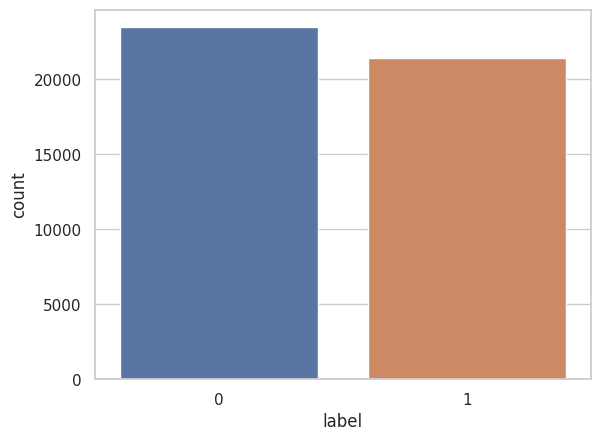

In [13]:
sns.countplot(data=data,
              x='label',
              order=data['label'].value_counts().index)

The code snippet uses the `sns.countplot()` function from the seaborn library to create a count plot based on the "label" column of the DataFrame. The `data=data` argument specifies the DataFrame from which the data will be plotted. The `x='label'` argument specifies the variable to be plotted on the x-axis, which is the "label" column in this case. The `order=data['label'].value_counts().index` argument specifies the order of the bars on the x-axis based on the descending order of the frequency counts of each label. This ensures that the bars are plotted in order of their frequency.

1. Dependencies:
   - The code snippet assumes that the seaborn library has already been imported, as mentioned in the previous explanations.

2. Functions and Classes:
   - `sns.countplot()`: This function is provided by the seaborn library and is used to create a count plot. It shows the count of observations in each category of a categorical variable. In this code, it is used to create a count plot based on the "label" column of the DataFrame.
   - `value_counts()`: This method is called on the "label" column of the DataFrame and calculates the frequency count of unique values in that column. It returns a Series where the unique values are the index, and the corresponding counts are the values.
   - `index`: This attribute is called on the result of `value_counts()` and retrieves the index (unique values) of the Series in descending order of their counts. It returns a pandas Index object representing the unique labels in the "label" column.

3. Variables:
   - `data`: This variable refers to the DataFrame that has been modified and shuffled in the previous code snippets. It represents the combined dataset containing both true and fake news articles, with the "title" and "subject" columns removed and the text of each article concatenated into the "text" column.

<font size="4">**Data Cleaning**</font>

In [14]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize text into individual words
    tokens = word_tokenize(text)

    # Remove stopwords
    custom_stopwords = stopwords.words('english')
    tokens = [word for word in tokens if word not in custom_stopwords]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in tokens)

    return text

data['text'] = data['text'].apply(preprocess_text)

The `preprocess_text()` function performs several text preprocessing steps on the input text. It converts the text to lowercase, removes numbers and punctuation, tokenizes the text into individual words, removes stopwords, lemmatizes the words, and joins them back into a single string. This helps to reduce noise and improve the quality of the text data.

1. Function:
   - `preprocess_text(text)`: This function takes a text input as an argument and performs a series of text preprocessing steps on it. The purpose of this function is to clean and preprocess the text data before further analysis or modeling.

2. Functions and Classes:
   - `text.lower()`: This method is called on the `text` variable and converts the text to lowercase. This step is commonly used to ensure consistency and remove case sensitivity.
   - `re.sub(pattern, replacement, text)`: This function is from the `re` module, which is Python's regular expression library. It is used to perform pattern-based substitution in the `text` variable. In this code, it is used to remove numbers by substituting them with an empty string.
   - `re.sub(r'[^\w\s]', '', text)`: This regular expression pattern removes punctuation from the `text` variable. It replaces any non-alphanumeric characters and spaces with an empty string.
   - `word_tokenize(text)`: This function is from the `nltk.tokenize` module, which is part of the Natural Language Toolkit (NLTK) library. It is used to tokenize the `text` variable into individual words or tokens.
   - `nltk.corpus.stopwords.words('english')`: This statement retrieves the list of stopwords for the English language from the NLTK corpus. Stopwords are commonly occurring words that are often removed from text data as they typically do not carry much meaning.
   - List comprehension: The code uses a list comprehension to remove stopwords from the `tokens` list. Each word in the `tokens` list is checked to see if it is in the list of stopwords, and only the words that are not stopwords are kept in the `tokens` list.
   - `nltk.stem.WordNetLemmatizer()`: This class is from the `nltk.stem` module and is used for lemmatizing words. Lemmatization is the process of reducing words to their base or dictionary form. In this code, it is used to lemmatize each word in the `tokens` list.
   - `lemmatizer.lemmatize(word)`: This method is called on the `lemmatizer` object and lemmatizes each word in the `text` variable. It returns the base or dictionary form of each word.
   - `' '.join(lemmatizer.lemmatize(word) for word in tokens)`: This statement joins the lemmatized words in the `tokens` list back into a single string, with each word separated by a space.

3. Variables:
   - `text`: This variable represents the input text that needs to be preprocessed.
   - `tokens`: This variable holds the list of individual words or tokens obtained after tokenizing the text.
   - `custom_stopwords`: This variable stores the list of stopwords specifically for the English language, obtained from the NLTK corpus.

<font size="4">**Converting text into Vectors**</font>

In [15]:
x_train, x_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((31428,), (13470,), (31428,), (13470,))

`train_test_split(data['text'], data['label'], test_size=0.3, random_state=42)` is called, where `data['text']` represents the features, `data['label']` represents the labels, `test_size=0.3` specifies that 30% of the data will be used for testing, and `random_state=42` sets a specific random seed for reproducibility. The code then assigns the resulting subsets to the variables `x_train`, `x_test`, `y_train`, and `y_test`. Finally, the `shape` attribute is used to obtain the dimensions of each subset (`x_train.shape`, `x_test.shape`, `y_train.shape`, `y_test.shape`), which can provide insights into the number of samples in each set.

1. Dependencies:
   - The code snippet assumes that the `train_test_split` function has been imported from the `sklearn.model_selection` module. This function is used to split the dataset into training and testing sets.

2. Functions and Classes:
   - `train_test_split()`: This function is provided by the `sklearn.model_selection` module and is used to split the dataset into random train and test subsets. It takes input arrays (or matrices) `x` and `y`, representing the features and labels, respectively. The function randomly splits the data into train and test sets based on the specified `test_size` parameter. It returns four subsets: `x_train`, `x_test`, `y_train`, and `y_test`, representing the features and labels for the training and testing sets, respectively.

3. Variables:
   - `data['text']` and `data['label']`: These variables represent the features (text) and labels in the `data` DataFrame, respectively. The `text` column contains the text data, and the `label` column contains the corresponding labels.
   - `x_train`, `x_test`, `y_train`, and `y_test`: These variables store the outputs of the `train_test_split()` function. They represent the features and labels for the training and testing sets, respectively.

In [16]:
vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

The code snippet above utilizes the `TfidfVectorizer` class from scikit-learn to perform TF-IDF vectorization on the text data. First, an instance of the `TfidfVectorizer` class is created and assigned to the `vectorization` variable. Then, the `fit_transform()` method is called on the `x_train` data, which fits the vectorizer on the training set and transforms it into TF-IDF feature vectors. The `transform()` method is called on the `x_test` data, which transforms the testing set using the already fitted vectorizer. After this process, both `x_train` and `x_test` will contain the TF-IDF feature vectors representing the text data. These feature vectors can then be used as input for training and evaluating machine learning models.

1. Dependencies:
   - The code snippet assumes that the `TfidfVectorizer` class has been imported from the `sklearn.feature_extraction.text` module. This class is used for text feature extraction using the Term Frequency-Inverse Document Frequency (TF-IDF) representation.

2. Functions and Classes:
   - `TfidfVectorizer()`: This class is provided by the `sklearn.feature_extraction.text` module and is used to convert a collection of raw documents into a matrix of TF-IDF features. It transforms the text data into numerical feature vectors that can be used as input for machine learning models. The class provides various parameters to control the behavior of the vectorization process, such as specifying the maximum number of features, handling n-grams, applying tokenization, etc.

3. Variables:
   - `vectorization`: This variable represents an instance of the `TfidfVectorizer` class. It is used to perform the vectorization process on the text data.
   - `x_train`: This variable represents the features (text) for the training set. It is the input data to be transformed and vectorized using the `vectorization` instance. After the transformation, it will contain the TF-IDF feature vectors for the training set.
   - `x_test`: This variable represents the features (text) for the testing set. It is the input data to be transformed and vectorized using the already fitted `vectorization` instance. After the transformation, it will contain the TF-IDF feature vectors for the testing set.

<font size="4">**Model training, Evaluation, and Prediction**</font>

**Main Class**

In [17]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Train the model
    model.fit(x_train, y_train)

    # Predict on the training and test data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    def measure_error(y_true, y_pred, label, x_data):
        return pd.Series({'Accuracy': accuracy_score(y_true, y_pred),
                          'Precision': precision_score(y_true, y_pred),
                          'Recall': recall_score(y_true, y_pred),
                          'F1 Score': f1_score(y_true, y_pred),
                          'MSE': mean_squared_error(y_true, y_pred),
                          'MAE': mean_absolute_error(y_true, y_pred),
                          'ROC AUC': roc_auc_score(y_true, y_pred)},
                         name=label)

    # Calculate evaluation metrics for the original model
    train_metrics = measure_error(y_train, y_train_pred, 'Train', x_train)
    test_metrics = measure_error(y_test, y_test_pred, 'Test', x_test)

    # Calculate confusion matrix for the original model
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    # Plot confusion matrix for the original model
    cm_display_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[False, True])
    cm_display_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[False, True])

    # Print the results for the original model
    print("Training Data:")
    print(train_metrics)
    cm_display_train.plot()
    plt.show()

    print("Test Data:")
    print(test_metrics)
    cm_display_test.plot()
    plt.show()

    return model

The code defines a function named `evaluate_model` that evaluates the performance of a given model using various metrics and visualizations. 
The `evaluate_model` function evaluates the performance of a model by training it, calculating various evaluation metrics, and visualizing the confusion matrix. It utilizes scikit-learn functions and classes for metrics calculation and visualization, along with the `matplotlib.pyplot` module for plotting the confusion matrix.

1. Dependencies:
   - The code snippet assumes that the following modules and functions have been imported:
        - `pandas` (imported as `pd`) is a library used for data manipulation and analysis. It is used in the function to create a pandas Series object for storing the evaluation metrics.
        - `sklearn.metrics.accuracy_score` calculates the accuracy of the model's predictions by comparing the predicted labels with the true labels.
        - `sklearn.metrics.precision_score` calculates the precision of the model's predictions. Precision measures the proportion of true positive predictions out of all positive predictions.
        - `sklearn.metrics.recall_score` calculates the recall of the model's predictions. Recall measures the proportion of true positive predictions out of all actual positive instances.
        - `sklearn.metrics.f1_score` calculates the F1 score, which is the harmonic mean of precision and recall. It provides a balanced measure of precision and recall.
        - `sklearn.metrics.mean_squared_error` calculates the mean squared error between the true labels and the predicted labels. This metric is commonly used for regression problems.
        - `sklearn.metrics.mean_absolute_error` calculates the mean absolute error between the true labels and the predicted labels. This metric is commonly used for regression problems.
        - `sklearn.metrics.roc_auc_score` calculates the Area Under the Receiver Operating Characteristic Curve (ROC AUC). It measures the model's ability to distinguish between positive and negative instances.
        - `sklearn.metrics.confusion_matrix` calculates the confusion matrix, which shows the counts of true positive, true negative, false positive, and false negative predictions.
        - `sklearn.metrics.ConfusionMatrixDisplay` is a class used to display the confusion matrix in a visually appealing way.
        - `matplotlib.pyplot` is a module used for creating plots and visualizations. It is used in the function to plot the confusion matrix.

2. The `evaluate_model` Function:
   - This function takes a model object (`model`), training features (`x_train`), training labels (`y_train`), testing features (`x_test`), and testing labels (`y_test`) as inputs.
   - The function fits the model on the training data using the `fit` method.
   - The model is then used to predict labels for both the training and testing data using the `predict` method.
   - Various evaluation metrics are calculated using the true labels and predicted labels.
   - Evaluation metrics include accuracy, precision, recall, and F1 score.
   - The confusion matrix is calculated using `confusion_matrix` and stored in `cm_train` and `cm_test` for the training and testing data, respectively.
   - `ConfusionMatrixDisplay` is used to create visualization objects (`cm_display_train` and `cm_display_test`) for displaying the confusion matrix with appropriate labels.
   - The results are printed, including accuracy, precision, recall, F1 score, and the confusion matrix for both the training and testing data.
   - The confusion matrices are plotted using `cm_display_train.plot()` and `cm_display_test.plot()`, along with `matplotlib.pyplot.show()`.

**Models Used**

The code snippets below demonstrate the usage of different classification models, including Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, and XGBoost. It evaluates the performance of each model using the `evaluate_model` function. The code demonstrates the usage of various classification models and evaluates their performance using the `evaluate_model` function. Each model is initialized, trained, and evaluated using the training and testing data. The `evaluate_model` function calculates various evaluation metrics and displays the confusion matrices using scikit-learn functions and classes.

1. Dependencies:
   - The code assumes that the following modules and functions have been imported:
     - `sklearn.linear_model.LogisticRegression`: This class is used to create an instance of the Logistic Regression model. Logistic Regression is a linear classifier that models the probability of the input belonging to different classes.
     - `sklearn.tree.DecisionTreeClassifier`: This class is used to create an instance of the Decision Tree classifier. This class is used to create an instance of the Decision Tree classifier. Decision Trees partition the feature space into regions based on simple decision rules and can capture complex interactions between features.
     - `sklearn.ensemble.RandomForestClassifier`: This class is used to create an instance of the Random Forest classifier. Random Forests combine multiple Decision Trees to improve generalization performance and reduce overfitting.
     - `sklearn.ensemble.GradientBoostingClassifier`: This class is used to create an instance of the Gradient Boosting classifier. Gradient Boosting builds an ensemble of weak prediction models (typically Decision Trees) and iteratively improves predictions by focusing on the previously misclassified samples.
     - `xgboost.XGBClassifier`: This class is used to create an instance of the XGBoost classifier. XGBoost (Extreme Gradient Boosting) is an optimized implementation of Gradient Boosting that includes additional regularization techniques and efficient algorithms for tree construction.
     - `sklearn.linear_model.PassiveAggressiveClassifier`: This class is used to create an instance of the Passive Aggressive classifier. Passive Aggressive algorithms are online learning algorithms that aim to classify data with minimal computational resources while allowing for adaptive updates to the model.

2. Model Initialization and Evaluation:
   - For each model:
     - An instance of the model is created and assigned to the `model` variable.
     - The `evaluate_model` function which was defined earlier is called with the model, training data (`x_train`, `y_train`), and testing data (`x_test`, `y_test`) as arguments.
     - Inside the `evaluate_model` function, the model is trained on the training data using the `fit` method.
     - The model then makes predictions on the training and testing data using the `predict` method.
     - Various evaluation metrics such as accuracy, precision, recall, and F1 score are calculated using the true labels and predicted labels.
     - The confusion matrices for the training and testing data are calculated using `confusion_matrix`.
     - The confusion matrices are displayed using `ConfusionMatrixDisplay` and `plot`.
     - Finally, the results, including evaluation metrics and confusion matrices, are printed.

3. Output:
   - The `evaluate_model` function outputs the evaluation metrics, as well as the confusion matrices for the training and testing data.

**Logistic Regression Patched vs Unpatched**

In [18]:
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [19]:
params = {
    'C': 0.1,
    'solver': 'lbfgs',
    'multi_class': 'multinomial',
    'n_jobs': -1,
}

The code snippet defines a dictionary named `params` that contains various parameters for Logistic Regression.
- `'C'`: This parameter determines the inverse of the regularization strength. It controls how much the model should avoid misclassifying training examples. A smaller value of `C` indicates stronger regularization, while a larger value indicates weaker regularization. In this case, the value is set to `0.1`.
- `'solver'`: This parameter specifies the algorithm to be used for optimization. The value `'lbfgs'` corresponds to the Limited-memory Broyden-Fletcher-Goldfarb-Shanno (L-BFGS) algorithm. L-BFGS is an optimization algorithm that approximates the inverse Hessian matrix to update the model's weights efficiently.
- `'multi_class'`: This parameter defines the strategy to use when dealing with multiclass classification problems. The value `'multinomial'` indicates that the model should use the multinomial logistic regression approach. This approach generalizes binary logistic regression to handle multiple classes simultaneously.
- `'n_jobs'`: This parameter specifies the number of CPU cores to be used for parallel processing. A value of `-1` indicates that all available CPU cores should be utilized. Parallel processing can speed up model training by distributing the workload across multiple cores.

Training Data:
Accuracy     0.980050
Precision    0.977194
Recall       0.980922
F1 Score     0.979055
MSE          0.019950
MAE          0.019950
ROC AUC      0.980091
Name: Train, dtype: float64


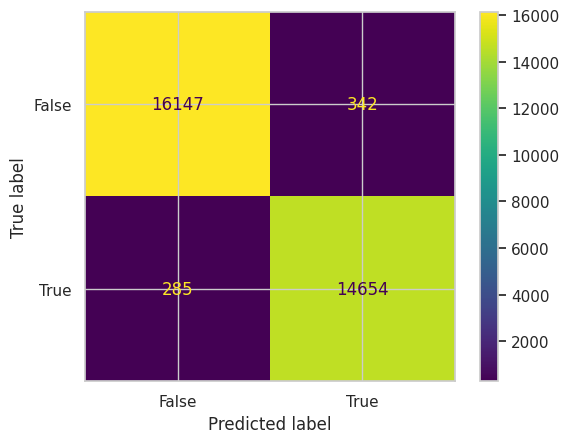

Test Data:
Accuracy     0.975056
Precision    0.972316
Recall       0.975918
F1 Score     0.974114
MSE          0.024944
MAE          0.024944
ROC AUC      0.975087
Name: Test, dtype: float64


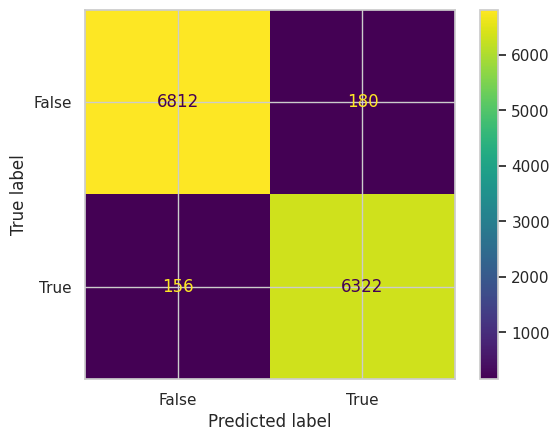

LogisticRegression(C=0.1, multi_class='multinomial', n_jobs=-1)

In [20]:
start = timer()
model_patched = LogisticRegression(**params).fit(x_train, y_train)
train_patched = timer() - start
f"Intel® extension for Scikit-learn time: {train_patched:.2f} s"
evaluate_model(model_patched, x_train, y_train, x_test, y_test)

In [21]:
y_pred_patched = model_patched.predict(x_test)
accuracy_patched = accuracy_score(y_test, y_pred_patched)
log_loss_patched = log_loss(y_test, model_patched.predict(x_test))
f"Intel® extension for Scikit-learn Log Loss: {log_loss_patched}"

'Intel® extension for Scikit-learn Log Loss: 0.8990844497953501'

In [22]:
unpatch_sklearn()

In [23]:
start = timer()
model_unpatched = LogisticRegression(**params).fit(x_train, y_train)
train_unpatched = timer() - start
f"Original Scikit-learn time: {train_unpatched:.2f} s"

'Original Scikit-learn time: 2.43 s'

In [24]:
y_pred_unpatched = model_unpatched.predict(x_test)
accuracy_unpatched = accuracy_score(y_test, y_pred_unpatched)
log_loss_unpatched = log_loss(y_test, model_unpatched.predict(x_test))
f"Original Scikit-learn Log Loss: {log_loss_unpatched}"

'Original Scikit-learn Log Loss: 0.8990844497953501'

In [25]:
HTML(f"<h3>Compare Accuracy of patched Scikit-learn and original</h3>"
     f"Accuracy of patched Logistic Regression: {accuracy_patched:.4f} <br>"
     f"Accuracy of unpatched Logistic Regression: {accuracy_unpatched:.4f} <br>"
     f"<h3>Compare Log Loss metric of patched Scikit-learn and original</h3>"
     f"Log Loss metric of patched Logistic Regression: {log_loss_patched:.4f} <br>"
     f"Log Loss metric of unpatched Logistic Regression: {log_loss_unpatched:.4f} <br>"
     f"Metrics ratio: {log_loss_patched / log_loss_unpatched:.4f} <br>"
     f"<h3>With Scikit-learn-intelex patching you can:</h3>"
     f"<ul>"
     f"<li>Use your Scikit-learn code for training and prediction with minimal changes (a couple of lines of code)</li>"
     f"<li>Get fast execution training and prediction of Scikit-learn models</li>"
     f"<li>Obtain similar quality results</li>"
     f"<li>Get a speedup of approximately {train_patched / train_unpatched:.1f} times</li>"
     f"</ul>")

The code snippets above showcase the usage of the Intel® Extension for Scikit-learn library to accelerate the training and prediction of a Logistic Regression model for fake news detection. It compares the accuracy and log loss metrics between the patched and unpatched Logistic Regression models, showcasing the potential speedup achieved with the Intel® Extension for Scikit-learn.
- `patch_sklearn()`: Function to patch the scikit-learn library with the Intel® Extension for Scikit-learn, enabling accelerated computation on Intel® CPUs.
- `unpatch_sklearn()`: Function to restore the original scikit-learn library without the Intel® Extension for Scikit-learn.
- `LogisticRegression(**params)`: Class from scikit-learn to create a Logistic Regression model instance with specified hyperparameters (`params` dictionary).
- `fit(x_train, y_train)`: Method to train the Logistic Regression model on the training data (`x_train` features and `y_train` labels).
- `evaluate_model(model, x_train, y_train, x_test, y_test)`: Function to evaluate the model's performance using various metrics and visualizations.
- `accuracy_score(y_true, y_pred)`: Function to calculate the accuracy of predicted labels (`y_pred`) compared to true labels (`y_true`).
- `log_loss(y_true, y_pred)`: Function to calculate the logarithmic loss between true labels (`y_true`) and predicted probabilities (`y_pred`).
- `HTML(...)`: Class from IPython.display module to display the comparison results of patched and unpatched Logistic Regression models in HTML format.

**Decision Tree**

Training Data:
Accuracy     1.0
Precision    1.0
Recall       1.0
F1 Score     1.0
MSE          0.0
MAE          0.0
ROC AUC      1.0
Name: Train, dtype: float64


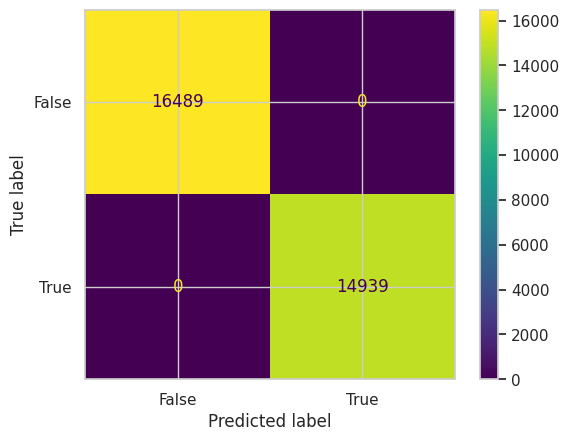

Test Data:
Accuracy     0.996362
Precision    0.996141
Recall       0.996295
F1 Score     0.996218
MSE          0.003638
MAE          0.003638
ROC AUC      0.996360
Name: Test, dtype: float64


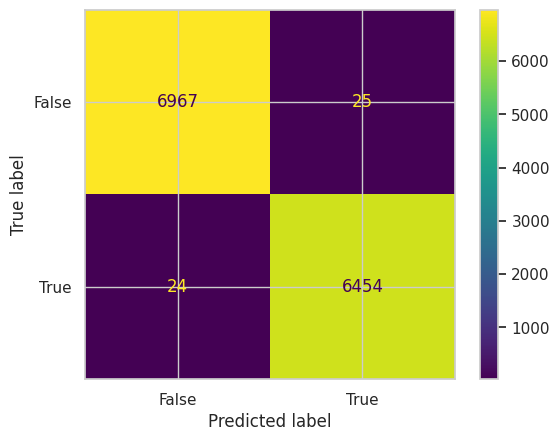

DecisionTreeClassifier()

In [26]:
model = DecisionTreeClassifier()
evaluate_model(model, x_train, y_train, x_test, y_test)

**Random Forest Classifier**

Training Data:
Accuracy     1.0
Precision    1.0
Recall       1.0
F1 Score     1.0
MSE          0.0
MAE          0.0
ROC AUC      1.0
Name: Train, dtype: float64


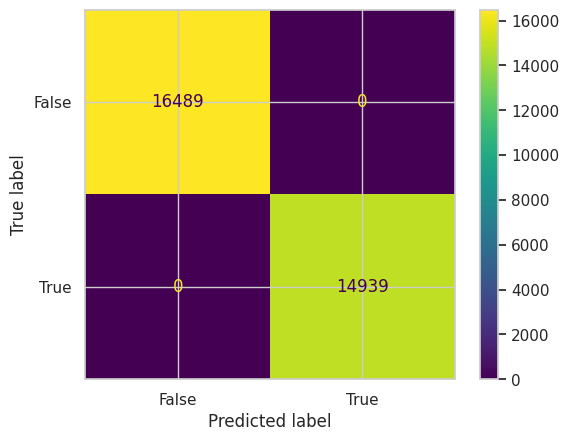

Test Data:
Accuracy     0.987899
Precision    0.988399
Recall       0.986416
F1 Score     0.987406
MSE          0.012101
MAE          0.012101
ROC AUC      0.987845
Name: Test, dtype: float64


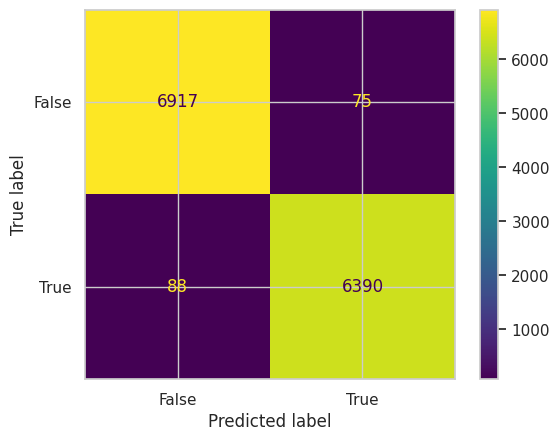

RandomForestClassifier()

In [27]:
model = model = RandomForestClassifier()
evaluate_model(model, x_train, y_train, x_test, y_test)

**Gradient Boosting**

Training Data:
Accuracy     0.996468
Precision    0.994267
Recall       0.998327
F1 Score     0.996292
MSE          0.003532
MAE          0.003532
ROC AUC      0.996555
Name: Train, dtype: float64


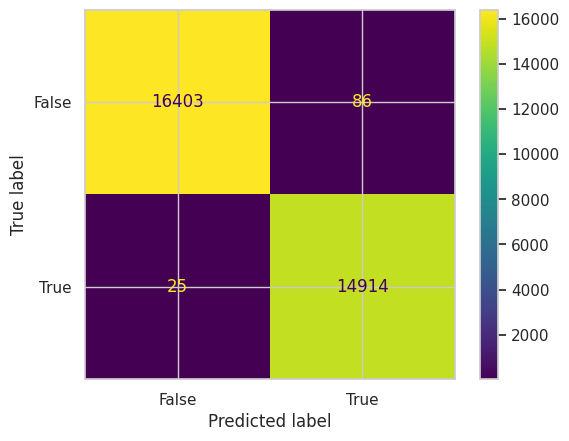

Test Data:
Accuracy     0.994655
Precision    0.993073
Recall       0.995832
F1 Score     0.994450
MSE          0.005345
MAE          0.005345
ROC AUC      0.994698
Name: Test, dtype: float64


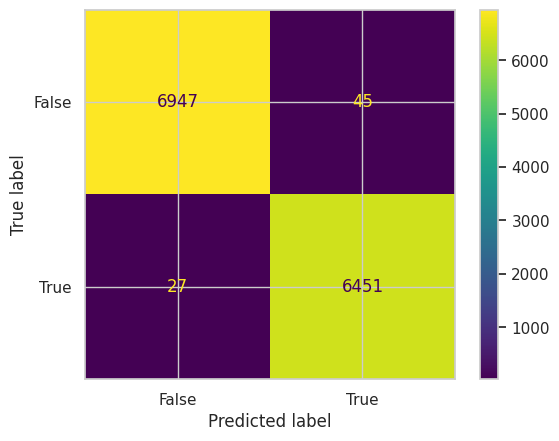

GradientBoostingClassifier()

In [28]:
model = GradientBoostingClassifier()
evaluate_model(model, x_train, y_train, x_test, y_test)

**Passive Aggressive Classifier**

Training Data:
Accuracy     1.0
Precision    1.0
Recall       1.0
F1 Score     1.0
MSE          0.0
MAE          0.0
ROC AUC      1.0
Name: Train, dtype: float64


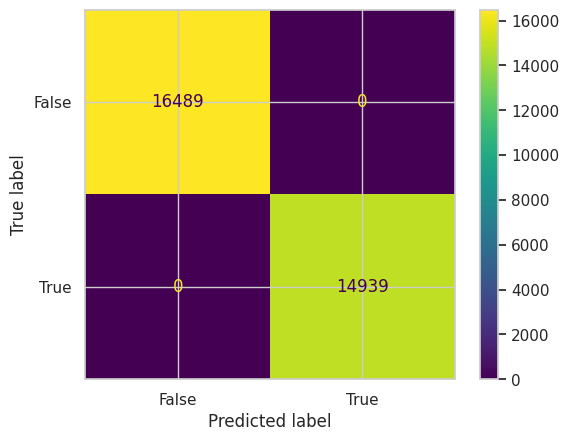

Test Data:
Accuracy     0.994655
Precision    0.994595
Recall       0.994288
F1 Score     0.994442
MSE          0.005345
MAE          0.005345
ROC AUC      0.994641
Name: Test, dtype: float64


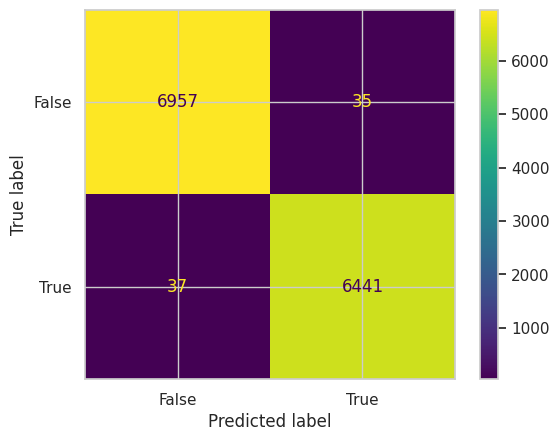

PassiveAggressiveClassifier()

In [29]:
model = PassiveAggressiveClassifier()
evaluate_model(model, x_train, y_train, x_test, y_test)

**XGBoost**

Training Data:
Accuracy     1.0
Precision    1.0
Recall       1.0
F1 Score     1.0
MSE          0.0
MAE          0.0
ROC AUC      1.0
Name: Train, dtype: float64


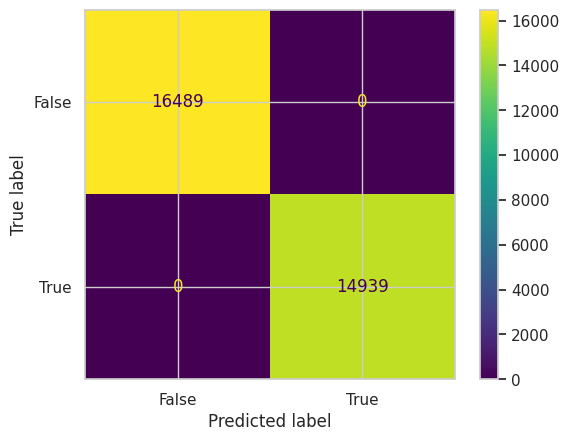

Test Data:
Accuracy     0.997476
Precision    0.997222
Recall       0.997530
F1 Score     0.997376
MSE          0.002524
MAE          0.002524
ROC AUC      0.997478
Name: Test, dtype: float64


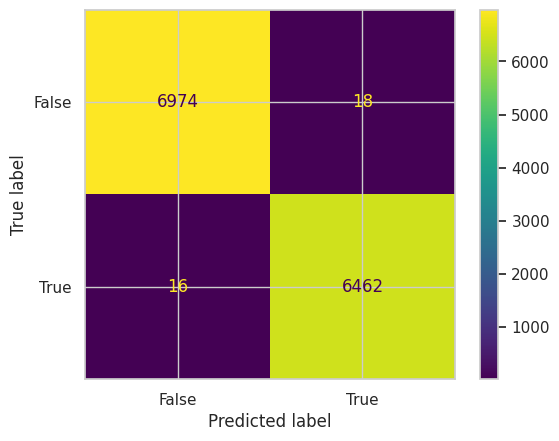

In [30]:
model = xgb.XGBClassifier()
evaluate_model(model, x_train, y_train, x_test, y_test)

# Serialize the model and save it to a file
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))

# Load the serialized model from file
loaded_model = pickle.load(open(filename, 'rb'))

The code involves creating, evaluating, serializing, saving, and loading an XGBoost classifier model using the XGBoost library and the `pickle` module.

- Functions:
  - `evaluate_model(model, x_train, y_train, x_test, y_test)`: Custom function that evaluates the performance of the XGBoost model using the provided training and testing data.

- Classes:
  - `xgb.XGBClassifier()`: Class from the XGBoost library used to create an instance of the XGBoost classifier model.

- Dependencies:
  - `xgb`: XGBoost library that provides the XGBoost classifier model.
  - `pickle`: Python module for object serialization used to save and load the trained model to/from a file.

- Steps:
  - Create an instance of the XGBoost classifier model: `model = xgb.XGBClassifier()`.
  - Evaluate the model using the custom function: `evaluate_model(model, x_train, y_train, x_test, y_test)`.
  - Serialize the model and save it to a file: `pickle.dump(model, open(filename, 'wb'))`.
  - Define a variable to store the file name: `filename = 'xgboost_model.pkl'`.
  - Load the serialized model from the file: `loaded_model = pickle.load(open(filename, 'rb'))`.

In [31]:
# Make predictions on the testing data
y_pred = loaded_model.predict(x_test)

# Calculate the prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9974758723088345


This code `y_pred = loaded_model.predict(x_test)` and `accuracy = accuracy_score(y_test, y_pred)` is there to verify if the serialization and deserialization of the model were successful by evaluating its prediction accuracy on the test data.

**Making Predictions with XGBoost**

In [32]:
def preprocess_text(news, model):
    news_vector = vectorization.transform([news])
    prediction_prob = model.predict_proba(news_vector)
    prediction = "true" if np.all(prediction_prob > 0.5) else "false"
    return prediction

# Predict whether the new user input is true or false using the loaded XGBoost model
news = input("Enter the news: ")
prediction = preprocess_text(news, loaded_model)

# Print the prediction label
print("Prediction:", prediction)

Enter the news:  Republican Senator Gets Dragged For Going After Robert Mueller


Prediction: false


In this code snippet, XGBoost is used to predict whether a news is true or false. The steps involved are preprocessing, vectorizing, and predicting the label of a user-entered news text using a TF-IDF vectorizer and a loaded XGBoost model. The prediction label is then printed to the console.

- Functions:
  - `preprocess_text(news, model)`: Custom function that preprocesses the news text and predicts the label using the provided model.

- Classes:
  - `TfidfVectorizer()`: Class from the scikit-learn library used for text vectorization, converting the news text into TF-IDF feature vectors.

- Dependencies:
  - `np`: NumPy library for mathematical and array operations.

- Code Steps:
  - Preprocess the news text and predict the label using the custom function: `prediction = preprocess_text(news, loaded_model)`.
  - Use the TF-IDF vectorizer to transform the news text into numerical feature vectors: `news_vector = vectorization.transform([news])`.
  - Predict the probability of the news being "true" or "false" using the loaded XGBoost model: `prediction_prob = model.predict_proba(news_vector)`.
  - Determine the prediction label based on the prediction probabilities: `"true" if np.all(prediction_prob > 0.5) else "false"`.
  - Prompt the user to enter the news text: `news = input("Enter the news: ")`.
  - Print the prediction label: `print("Prediction:", prediction)`.

*Other Possible Models*

The code snippets below demonstrates the usage of some other classification models, including Naive Bayes, Support Vector Machine (SVM), Multi-Layer Perceptron (Neural Network), and K-Nearest Neighbors (KNN). However, these models are commented out and not executed in the code but if uncommented, it would generate the same type of output as shown in the previous examples for other models.

1. Dependencies:
   - The following modules and functions need to be imported to use these models:
     - `sklearn.naive_bayes.GaussianNB`: This class is used to create an instance of the Gaussian Naive Bayes classifier.
     - `sklearn.svm.SVC`: This class is used to create an instance of the Support Vector Machine classifier.
     - `sklearn.neural_network.MLPClassifier`: This class is used to create an instance of the Multi-Layer Perceptron classifier (Neural Network).
     - `sklearn.neighbors.KNeighborsClassifier`: This class is used to create an instance of the K-Nearest Neighbors classifier.
     - The `evaluate_model` function defined earlier is used to evaluate the performance of each model.

2. Model Initialization and Evaluation: Works in the same way as the uncommented code.

The reason we have commented the code for these 4 models is due to the immense runtime they required when we ran them. KNN also happens to be an unsupervised machine learning algorithm but generally, supervised algorithms are preferred for fake new detection and MLP is more of a deep learning algorithm.

In [33]:
# usage with naive Bayes
# from sklearn.naive_bayes import GaussianNB
# model = GaussianNB()
# evaluate_model(model, x_train, y_train, x_test, y_test)

In [34]:
# usage with support vector machine (SVM)
# from sklearn.svm import SVC
# model = SVC()
# evaluate_model(model, x_train, y_train, x_test, y_test)

In [35]:
# usage with multi-layer perceptron (neural network)
# from sklearn.neural_network import MLPClassifier
# model = MLPClassifier()
# evaluate_model(model, x_train, y_train, x_test, y_test)

In [36]:
# usage with k-nearest neighbors (KNN)
# from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier()
# evaluate_model(model, x_train, y_train, x_test, y_test)